In [1]:
#对一个用户的365天进行先聚类，之后选取最多的类，即特征，之后对这些进行二次聚类
import csv#只有54个数据
 
#read file, for example
file_path = 'C:/Users/chenxihui/Desktop/code/project/2010.csv'
file = open(file_path)
data = []
for i in file.readlines():
    data.append(i)
file.close()

In [2]:
new_data = []
for row in data:
    tmp = row.strip('\n')  #去掉每行最后的回车符
    tmp = tmp.split(',')   #根据','来分割字符串，使之成为含有一个个数据的列表
    new_data.append(tmp)   #new_data的每一行数据就是一个列表

In [3]:
select_data = []
length=len(new_data)
for i in range(length):
    if(new_data[i][0]=='2' or new_data[i][0]=='13' or new_data[i][0]=='14' or new_data[i][0]=='20' or new_data[i][0]=='33' or new_data[i][0]=='35' or new_data[i][0]=='38' or new_data[i][0]=='39' or new_data[i][0]=='56' or new_data[i][0]=='69' or new_data[i][0]=='73' or new_data[i][0]=='74' or new_data[i][0]=='75' or new_data[i][0]=='82' or new_data[i][0]=='87' or new_data[i][0]=='88' or new_data[i][0]=='101' or new_data[i][0]=='104' or new_data[i][0]=='106' or new_data[i][0]=='109' or new_data[i][0]=='110' or new_data[i][0]=='119' or new_data[i][0]=='124' or new_data[i][0]=='130' or new_data[i][0]=='137' or new_data[i][0]=='141' or new_data[i][0]=='144' or new_data[i][0]=='152' or new_data[i][0]=='153' or new_data[i][0]=='157' or new_data[i][0]=='161' or new_data[i][0]=='169' or new_data[i][0]=='176' or new_data[i][0]=='184' or new_data[i][0]=='188' or new_data[i][0]=='189' or new_data[i][0]=='193' or new_data[i][0]=='201' or new_data[i][0]=='202' or new_data[i][0]=='204' or new_data[i][0]=='206' or new_data[i][0]=='207' or new_data[i][0]=='210' or new_data[i][0]=='211' or new_data[i][0]=='212' or new_data[i][0]=='214' or new_data[i][0]=='218' or new_data[i][0]=='244' or new_data[i][0]=='246' or new_data[i][0]=='253' or new_data[i][0]=='256' or new_data[i][0]=='273' or new_data[i][0]=='276' or new_data[i][0]=='297'):
        select_data.append(new_data[i][3:])#[5:]

In [4]:
GC=[]
CL=[]
GG=[]
Length_select_data = len(select_data)
for i in range(Length_select_data):
    if(select_data[i][0]=='GC'):
        GC.append(select_data[i][2:])
    elif(select_data[i][0]=='CL'):
        CL.append(select_data[i][2:])
    else:
        GG.append(select_data[i][2:])

In [5]:
import numpy as np

GC_temp=np.array(GC)
GC_array=[]
GC_array = GC_temp.astype(np.float)#春季有90天，夏季有91天，秋有92天，冬有92天

CL_temp=np.array(CL)
CL_array=[]
CL_array = CL_temp.astype(np.float)

GG_temp=np.array(GG)
GG_array=[]
GG_array = GG_temp.astype(np.float)
GG_array[1]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.031, 0.063, 0.069,
       0.069, 0.15 , 0.125, 0.125, 0.119, 0.125, 0.088, 0.069, 0.075,
       0.063, 0.038, 0.05 , 0.044, 0.031, 0.006, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   ])

In [29]:
import pandas as pd  #手肘法求最佳分类点
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
import multiprocessing
from sklearn.metrics import silhouette_score   

SSE = []  # 存放每次结果的误差平方和  
for k in range(2,8):  
    estimator = KMeans(n_clusters=k,n_jobs=multiprocessing.cpu_count(),)  # 构造聚类器  
    estimator.fit(GC_array)  
    SSE.append(estimator.inertia_) 
SSE    

[136184.7973061784,
 123672.98446438019,
 116602.9380574819,
 110979.82185951885,
 106565.89981235153,
 102905.98964376561]

In [36]:
import pandas as pd  #手肘法求最佳分类点
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
import multiprocessing
from sklearn.metrics import silhouette_score   

SSE = []  # 存放每次结果的误差平方和  
for k in range(1,15):  
    estimator = KMeans(n_clusters=k)  # 构造聚类器  
    estimator.fit(GC_array)  
    SSE.append(estimator.inertia_) 
SSE   

[171791.60355393315,
 136184.77389746625,
 123672.98232123388,
 116602.9380574819,
 110978.39359226983,
 106565.78354678255,
 102907.7006150695,
 100331.70100704093,
 97359.27156245829,
 95164.17341616141,
 93379.72822742055,
 91749.41474571449,
 90162.79577469279,
 88994.18726788484]

In [25]:
def train_cluster(train_vecs, model_name=None, start_k=2, end_k=15):
    print('training cluster')
    scores = []
    models = []
    for i in range(start_k, end_k):
        kmeans_model = KMeans(n_clusters=i, n_jobs=multiprocessing.cpu_count(), )
        kmeans_model.fit(train_vecs)
        score = silhouette_score(train_vecs,kmeans_model.labels_,metric='euclidean')
        scores.append(score)  # 保存每一个k值的score值, 在这里用欧式距离
        #print('{} Means score loss = {}'.format(i, score))
        models.append(kmeans_model)

    best_model = models[scores.index(max(scores))]
    return scores
scores=train_cluster(GC_array, model_name=None, start_k=2, end_k=15)
scores

training cluster


[0.3858017342693903,
 0.2839441900036668,
 0.22471846006192886,
 0.19569854097380673,
 0.16103713654105106,
 0.16901662449983165,
 0.1785820741620664,
 0.18172750180585973,
 0.10945636056338563,
 0.11868251075538969,
 0.10035821802054462,
 0.09151885087379041,
 0.09224494567367436]

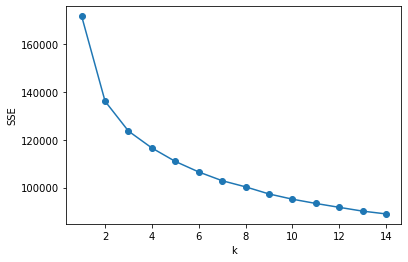

In [38]:
x = [i+1 for i in range(14)] 
plt.xlabel('k')  
plt.ylabel('SSE')  
plt.plot(x,SSE,'o-') 
plt.show() 


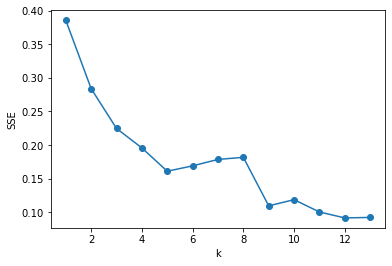

In [28]:
x = [i+1 for i in range(13)] 
plt.xlabel('k')  
plt.ylabel('SC')  
plt.plot(x,scores,'o-') 
plt.show() 

In [6]:
agents_365 = []#对每一个用户的365的数据放到一个数据集里面
for i in range(len(GC_array)):      
    if((i+1)%365==0): 
        agents_365.append(GC_array[i-364:i+1])

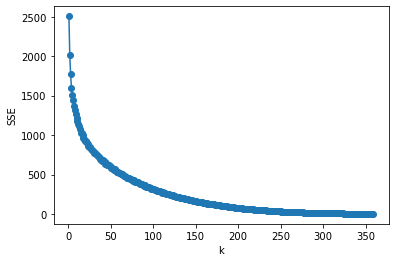

In [20]:
import pandas as pd  #手肘法求最佳分类点
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
  
SSE = []  # 存放每次结果的误差平方和  
for k in range(1,360):  
    estimator = KMeans(n_clusters=k)  # 构造聚类器  
    estimator.fit(agents_365[0])  
    SSE.append(estimator.inertia_)  
X = range(1,360)  
plt.xlabel('k')  
plt.ylabel('SSE')  
plt.plot(X,SSE,'o-')  
plt.show() 

In [14]:
from collections import defaultdict
from random import uniform
from math import sqrt
import matplotlib.pyplot as plt


def generate_list():
    list = []
    return list

def point_avg(points):
    """
    Accepts a list of points, each with the same number of dimensions.
    NB. points can have more dimensions than 2
    
    Returns a new point which is the center of all the points.
    """
    dimensions = len(points[0])

    new_center = []

    for dimension in range(dimensions):
        dim_sum = 0  # dimension sum
        for p in points:
            dim_sum += p[dimension]

        # average of each dimension
        new_center.append(dim_sum / float(len(points)))

    return new_center


def update_centers(data_set, assignments):
    """
    Accepts a dataset and a list of assignments; the indexes 
    of both lists correspond to each other.
    Compute the center for each of the assigned groups.
    Return `k` centers where `k` is the number of unique assignments.
    """
    new_means = defaultdict(generate_list)
    centers = []
    for assignment, point in zip(assignments, data_set):
        new_means[assignment].append(point)
        
    for points in new_means.values():
        centers.append(point_avg(points))

    return centers


def assign_points(data_points, centers):
    """
    Given a data set and a list of points betweeen other points,
    assign each point to an index that corresponds to the index
    of the center point on it's proximity to that point. 
    Return a an array of indexes of centers that correspond to
    an index in the data set; that is, if there are N points
    in `data_set` the list we return will have N elements. Also
    If there are Y points in `centers` there will be Y unique
    possible values within the returned list.
    """
    assignments = []
    for point in data_points:
        shortest = (1000)  # positive infinity
        shortest_index = 0
        for i in range(len(centers)):
            val = distance(point, centers[i])
            if(val < shortest):
                shortest = val
                shortest_index = i
        assignments.append(shortest_index)
    return assignments


def distance(a, b):
    """
    """
    dimensions = len(a)
    
    _sum = 0
    for dimension in range(dimensions):
        difference_sq = (a[dimension] - b[dimension]) ** 2
        _sum += difference_sq
    return sqrt(_sum)


def generate_k(data_set, k):
    """
    Given `data_set`, which is an array of arrays,
    find the minimum and maximum for each coordinate, a range.
    Generate `k` random points between the ranges.
    Return an array of the random points within the ranges.
    """
    centers = []
    dimensions = len(data_set[0])
    min_max = defaultdict(int)

    for point in data_set:
        for i in range(dimensions):
            val = point[i]
            min_key = 'min_%d' % i
            max_key = 'max_%d' % i
            if min_key not in min_max or val < min_max[min_key]:
                min_max[min_key] = val
            if max_key not in min_max or val > min_max[max_key]:
                min_max[max_key] = val

    for _k in range(k):
        rand_point = []
        for i in range(dimensions):
            min_val = min_max['min_%d' % i]
            max_val = min_max['max_%d' % i]
            
            rand_point.append(uniform(min_val, max_val))

        centers.append(rand_point)

    return centers


def k_means(dataset, k):
    k_points = generate_k(dataset, k)
    assignments = assign_points(dataset, k_points)
    old_assignments = None
    centers_history = []
    while assignments != old_assignments:
        new_centers = update_centers(dataset, assignments)
        centers_history.append(new_centers)
        old_assignments = assignments
        assignments = assign_points(dataset, new_centers)#centers_history[-1]

    return zip(assignments, dataset),centers_history

In [22]:
represent = []
for i in range(len(agents_365)):
    out,final_center = k_means(agents_365[i], 2)#agents_365[0]代表第一个用户的365天数据    
    list = []   # so, we need to show it in list
    for i in out:
        list.append(i)
    num0=str(list).count("0")
    num1=str(list).count("1")
    if(num0<num1):
        represent.append(final_center[-1][1])
    else:
        represent.append(final_center[-1][0])
len(represent)

54

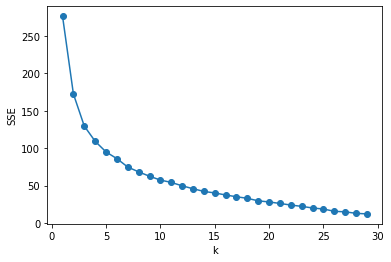

In [23]:
import pandas as pd  #手肘法求最佳分类点
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
  
SSE = []  # 存放每次结果的误差平方和  
for k in range(1,30):  
    estimator = KMeans(n_clusters=k)  # 构造聚类器  
    estimator.fit(represent)  
    SSE.append(estimator.inertia_)  
X = range(1,30)  
plt.xlabel('k')  
plt.ylabel('SSE')  
plt.plot(X,SSE,'o-')  
plt.show() 

training cluster


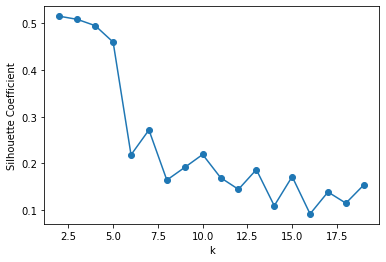

In [142]:
from sklearn.cluster import KMeans
import multiprocessing
from sklearn.metrics import silhouette_score   
def train_cluster(train_vecs, model_name=None, start_k=2, end_k=20):
    print('training cluster')
    scores = []
    models = []
    for i in range(start_k, end_k):
        kmeans_model = KMeans(n_clusters=i, n_jobs=multiprocessing.cpu_count(), )
        kmeans_model.fit(train_vecs)
        score = silhouette_score(train_vecs,kmeans_model.labels_,metric='euclidean')
        scores.append(score)  # 保存每一个k值的score值, 在这里用欧式距离
        #print('{} Means score loss = {}'.format(i, score))
        models.append(kmeans_model)

    best_model = models[scores.index(max(scores))]
    return scores
scores=train_cluster(agents_365[1], model_name=None, start_k=2, end_k=20)
X = range(2,20)  
plt.xlabel('k')  
plt.ylabel('Silhouette Coefficient')  
plt.plot(X,scores,'o-')  
plt.show() 

training cluster
2 Means score loss = 0.3363478142290727
3 Means score loss = 0.34644965353923846
4 Means score loss = 0.3505537741603713
5 Means score loss = 0.34015614807114225
6 Means score loss = 0.3148812478095694
7 Means score loss = 0.28507391041004976
8 Means score loss = 0.20175230600426183
9 Means score loss = 0.2254809556334099
10 Means score loss = 0.2032805953491744
11 Means score loss = 0.17784337231189698
12 Means score loss = 0.20242225278924494
13 Means score loss = 0.21623614296274588
14 Means score loss = 0.21156743115187648
15 Means score loss = 0.20842004726546784
16 Means score loss = 0.2217736464158464
17 Means score loss = 0.21599769981774022
18 Means score loss = 0.22356804939158967
19 Means score loss = 0.20678240012823196


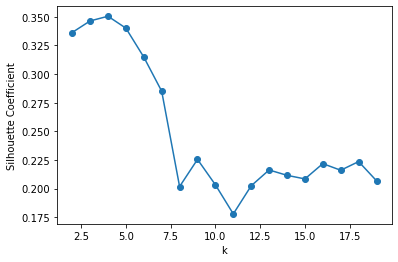

In [141]:
scores=train_cluster(agents_365[0], model_name=None, start_k=2, end_k=20)
X = range(2,20)  
plt.xlabel('k')  
plt.ylabel('Silhouette Coefficient')  
plt.plot(X,scores,'o-')  
plt.show() 

training cluster


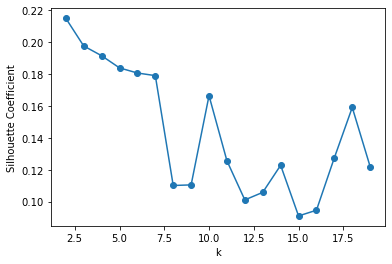

In [143]:
scores=train_cluster(agents_365[2], model_name=None, start_k=2, end_k=20)
X = range(2,20)  
plt.xlabel('k')  
plt.ylabel('Silhouette Coefficient')  
plt.plot(X,scores,'o-')  
plt.show() 

In [135]:
out,final_center = k_means(agents_365[2], 4)#agents_365[0]代表第一个用户的365天数据，四分类考虑春夏秋冬    
list = []   # so, we need to show it in list
for i in out:
    list.append(i)

In [136]:
dist1=[]
dist2=[]
dist3=[]
dist4=[]
dist5=[]
label_pred=[]
points=[]
length_list=len(list)
for i in range(length_list):
    if(list[i][0]==0):
        dist1.append(distance(agents_365[0][i],final_center[-1][0]))
    elif(list[i][0]==1):
        dist2.append(distance(agents_365[0][i],final_center[-1][1]))
    elif(list[i][0]==2):
        dist3.append(distance(agents_365[0][i],final_center[-1][2]))
    elif(list[i][0]==3):
        dist4.append(distance(agents_365[0][i],final_center[-1][3]))
    elif(list[i][0]==4):
        dist5.append(distance(agents_365[0][i],final_center[-1][4]))
dist1[0]

3.784666674772025

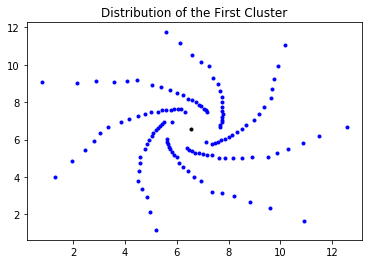

In [137]:
import numpy as np
dist11=dist1
dist11.sort()
max_dist11=dist11[-1]
len_dist11=len(dist11)
for i in range(len_dist11):
    theta=(i+1)*360/(len_dist11+1)
    x=max_dist11+dist11[i]*np.cos(theta)
    y=max_dist11+dist11[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist11, max_dist11, c='k', marker='.')
plt.title('Distribution of the First Cluster')
plt.show()

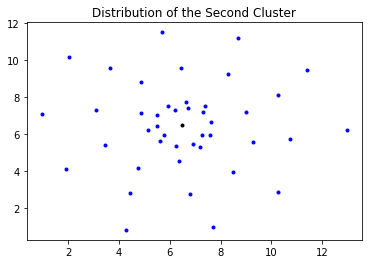

In [138]:
dist2.sort()
max_dist2=dist2[-1]
len_dist2=len(dist2)
for i in range(len_dist2):
    theta=(i+1)*360/(len_dist2+1)
    x=max_dist2+dist2[i]*np.cos(theta)
    y=max_dist2+dist2[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist2, max_dist2, c='k', marker='.')
plt.title('Distribution of the Second Cluster')
plt.show()

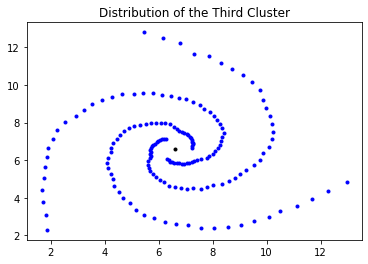

In [139]:
dist3.sort()
max_dist3=dist3[-1]
len_dist3=len(dist3)
for i in range(len_dist3):
    theta=(i+1)*360/(len_dist3+1)
    x=max_dist3+dist3[i]*np.cos(theta)
    y=max_dist3+dist3[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist3, max_dist3, c='k', marker='.')
plt.title('Distribution of the Third Cluster')
plt.show()

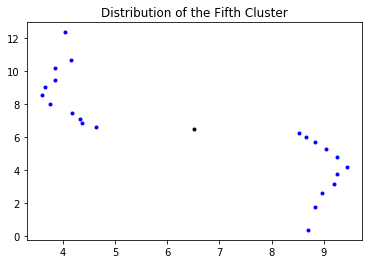

In [140]:
dist4.sort()
max_dist4=dist4[-1]
len_dist4=len(dist4)
for i in range(len_dist4):
    theta=(i+1)*360/(len_dist4+1)
    x=max_dist4+dist4[i]*np.cos(theta)
    y=max_dist4+dist4[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist4, max_dist4, c='k', marker='.')
plt.title('Distribution of the Fourth Cluster')
plt.show()